In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_df=pd.read_csv("GTSRB/Train.csv")
test_df=pd.read_csv("GTSRB/Test.csv")

In [3]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [9]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [4]:
train_df.shape

(39209, 8)

In [5]:
test_df.shape

(12630, 8)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [7]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [23]:
def load_images(df):
    images = []
    labels = []
    for row in df.itertuples(index=False):
        img = cv2.imread('GTSRB/'+row.Path)
        img = cv2.resize(img, (32,32))
        img = img / 255.0
        images.append(img)
        labels.append(row.ClassId)
    return np.array(images), np.array(labels)

In [24]:
x_train, y_train = load_images(train_df)
x_test, y_test = load_images(test_df)

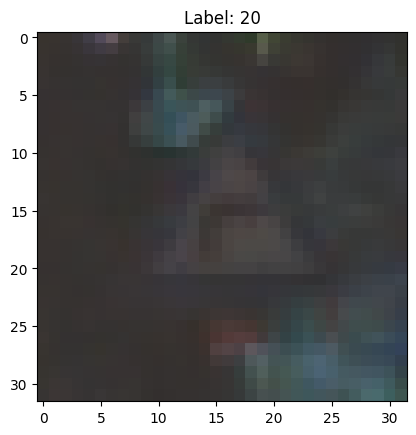

In [25]:
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

In [26]:
NUM_CLASSES = train_df['ClassId'].nunique()

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - accuracy: 0.3182 - loss: 2.5555 - val_accuracy: 0.8363 - val_loss: 0.6361
Epoch 2/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.7947 - loss: 0.6633 - val_accuracy: 0.9053 - val_loss: 0.3565
Epoch 3/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.8830 - loss: 0.3783 - val_accuracy: 0.9296 - val_loss: 0.2754
Epoch 4/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 74s 64ms/step - accuracy: 0.9136 - loss: 0.2776 - val_accuracy: 0.9401 - val_loss: 0.2362
Epoch 5/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9316 - loss: 0.2131 - val_accuracy: 0.9409 - val_loss: 0.2248
Epoch 6/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 46s 70ms/step - accuracy: 0.9453 - loss: 0.1715 - val_accuracy: 0.9485 - val_loss: 0.2101
Epoch 7/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - accuracy: 0.9496 - loss: 0.1601 - val_accuracy: 0.9429 - val_loss: 0.2221
Epoch 8/10
613/613 ━━━━━━━━━━━━━━━━━━━━ 99s 98ms/step - accuracy: 0.9577 - loss: 0.1351 

In [31]:
pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step


In [32]:
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

Test Accuracy: 0.9570863024544735


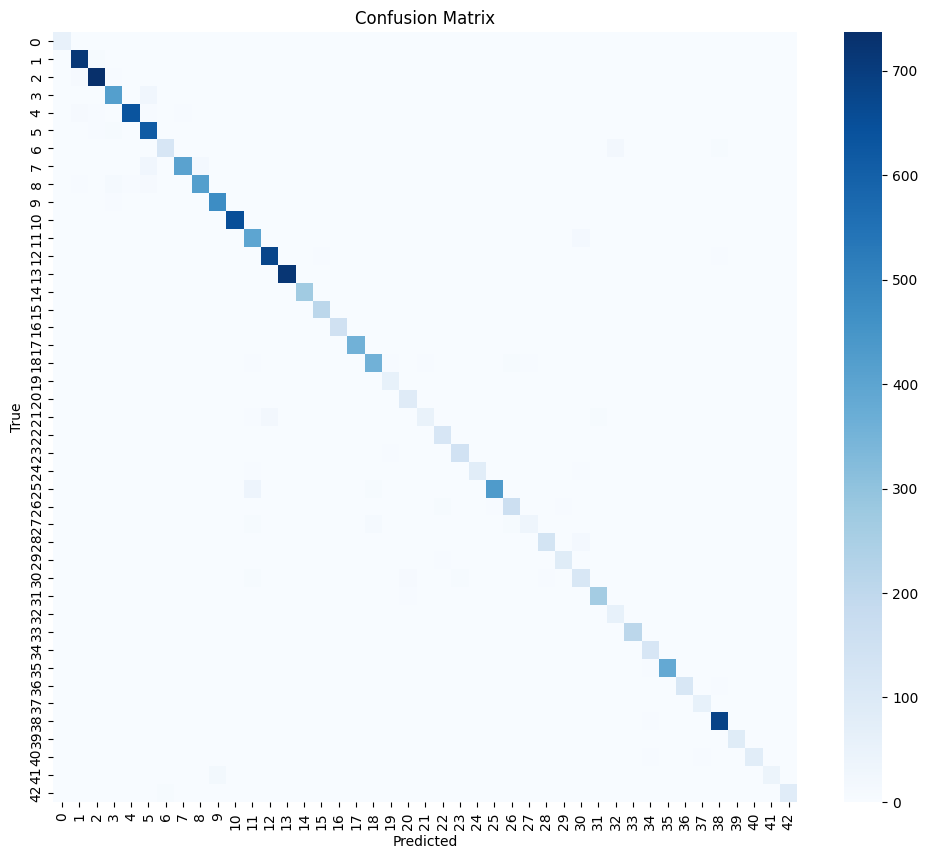

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()